<a href="https://colab.research.google.com/github/itonse/google-colab-archive/blob/main/goohaeyou_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

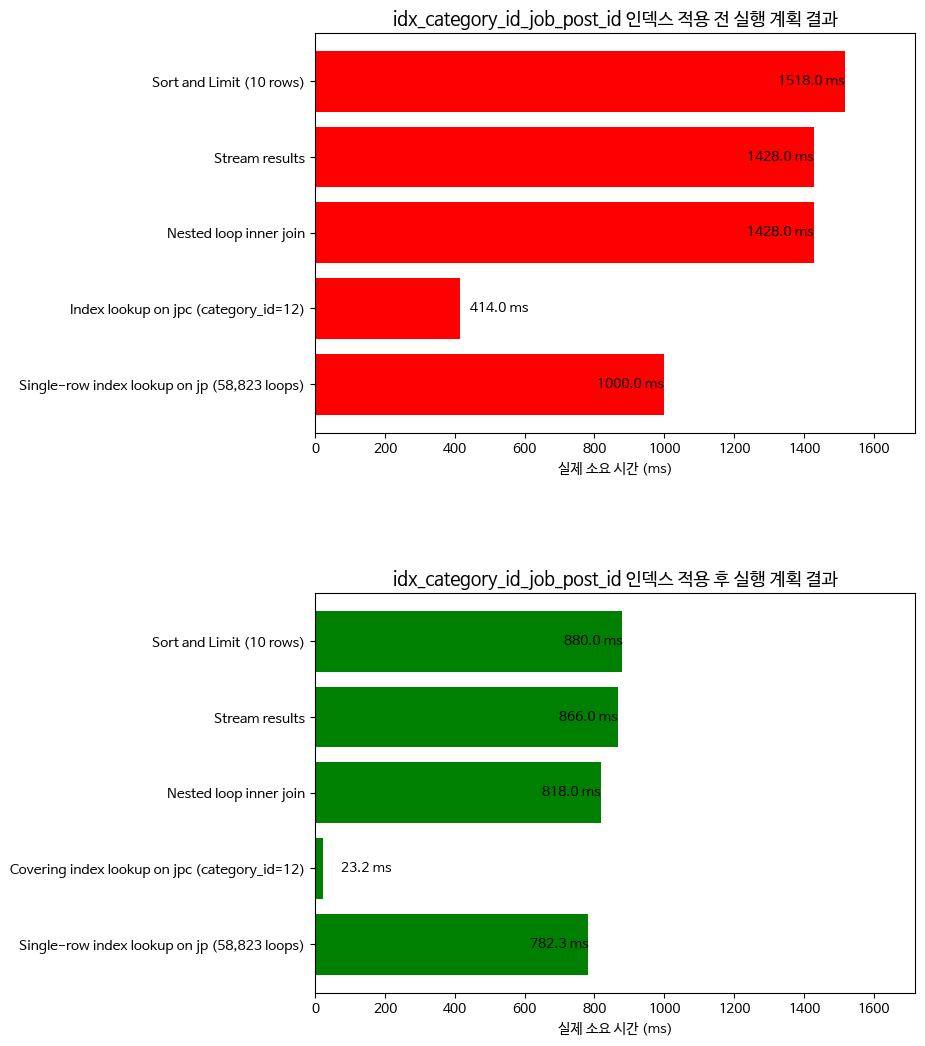

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 입력
data_before_corrected = {
    'Step': [
        'Sort and Limit (10 rows)',
        'Stream results',
        'Nested loop inner join',
        'Index lookup on jpc (category_id=12)',
        'Single-row index lookup on jp (58,823 loops)'
    ],
    'Actual Time (ms)': [1518, 1428, 1428, 414, 999.991],
    'Rows': [10, 58823, 58823, 58823, 58823]
}

data_after_corrected = {
    'Step': [
        'Sort and Limit (10 rows)',
        'Stream results',
        'Nested loop inner join',
        'Covering index lookup on jpc (category_id=12)',
        'Single-row index lookup on jp (58,823 loops)'
    ],
    'Actual Time (ms)': [880, 866, 818, 23.2, 782.3409],
    'Rows': [10, 58823, 58823, 58823, 58823]
}

# 데이터프레임 생성
df_before_corrected = pd.DataFrame(data_before_corrected)
df_after_corrected = pd.DataFrame(data_after_corrected)

# x축 범위 및 눈금 설정
x_max = max(df_before_corrected['Actual Time (ms)'].max(), df_after_corrected['Actual Time (ms)'].max())
x_ticks = range(0, int(x_max) + 200, 200)

# 시각화 설정
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# 복합 인덱스 적용 전 실행 계획 시각화
ax[0].barh(df_before_corrected['Step'], df_before_corrected['Actual Time (ms)'], color='red')
ax[0].set_title('idx_category_id_job_post_id 인덱스 적용 전 실행 계획 결과', fontsize=13)
ax[0].set_xlabel('실제 소요 시간 (ms)')
ax[0].set_xlim(0, x_max + 200)
ax[0].set_xticks(x_ticks)
ax[0].invert_yaxis()
for index, value in enumerate(df_before_corrected['Actual Time (ms)']):
    if df_before_corrected['Step'][index] == 'Index lookup on jpc (category_id=12)':
        ax[0].text(value + 30, index, f'{value:.1f} ms', va='center', ha='left', fontsize=10, color='black')
    else:
        ax[0].text(value, index, f'{value:.1f} ms', va='center', ha='right', fontsize=10, color='black')

# 복합 인덱스 적용 후 실행 계획 시각화
ax[1].barh(df_after_corrected['Step'], df_after_corrected['Actual Time (ms)'], color='green')
ax[1].set_title('idx_category_id_job_post_id 인덱스 적용 후 실행 계획 결과', fontsize=13)
ax[1].set_xlabel('실제 소요 시간 (ms)')
ax[1].set_xlim(0, x_max + 200)
ax[1].set_xticks(x_ticks)
ax[1].invert_yaxis()
for index, value in enumerate(df_after_corrected['Actual Time (ms)']):
    if "Covering index lookup on jpc" in df_after_corrected['Step'][index]:
        ax[1].text(value + 50, index, f'{value:.1f} ms', va='center', ha='left', fontsize=10, color='black')
    else:
        ax[1].text(value, index, f'{value:.1f} ms', va='center', ha='right', fontsize=10, color='black')

# 그래프 간격 조정
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.4, right=0.9, hspace=0.4)

# 그래프 출력
plt.show()